In [35]:
import torch
from torchvision import datasets, transforms
from torchvision.transforms import v2
import matplotlib.pyplot as plt
import numpy as np

trainData = datasets.CIFAR10(root='../data', train=True, download=True, transform=transforms.ToTensor())
testData = datasets.CIFAR10(root='../data', train=False, download=True, transform=transforms.ToTensor())

Files already downloaded and verified
Files already downloaded and verified


In [36]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using mps device


In [37]:
trainData.data.shape

(50000, 32, 32, 3)

In [38]:
from torch.utils.data import DataLoader, Subset

# Number of samples per class for the validation set
num_classes = 10
samples_per_class = 1000
total_val_samples = num_classes * samples_per_class

# Get indices of samples for each class
class_indices = [[] for _ in range(num_classes)]
for idx, (data, label) in enumerate(trainData):
    class_indices[label].append(idx)


val_indices = []
train_indices = []
for class_idx in class_indices:
    np.random.shuffle(class_idx)
    val_indices.extend(class_idx[:samples_per_class])
    train_indices.extend(class_idx[samples_per_class:])

# Create Subsets for the train and validation datasets
train_dataset = Subset(trainData, train_indices)
val_dataset = Subset(trainData, val_indices)

# Create DataLoaders
trainLoader = DataLoader(train_dataset, batch_size=64, shuffle=True)
valLoader = DataLoader(val_dataset, batch_size=64, shuffle=False)
testLoader = DataLoader(testData, batch_size=64, shuffle=True)

# Optionally print the number of samples in each set
print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of validation samples: {len(val_dataset)}")

Number of training samples: 40000
Number of validation samples: 10000


In [39]:
val_dataset.dataset.data.shape

(50000, 32, 32, 3)

In [40]:
# trainFeatures, trainLabels = next(iter(trainLoader))
# X = trainFeatures[0]
# X = v2.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5)(X)
# plt.imshow(X.permute(1, 2, 0))
# plt.show()

In [41]:
import torch.nn as nn

class Print(nn.Module):
    def __init__(self, name):
        super(Print, self).__init__()
        self.name = name

    def forward(self, x):
        # print(str(x.shape) + " " + self.name)
        return x

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv3 = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3),
            nn.ReLU(),
            nn.Flatten(),
        )
        self.conv5 = nn.Sequential(
            nn.Conv2d(5, 32, kernel_size=5),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=5),
            nn.ReLU(),
            nn.Flatten(),
        )
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(64*13*13+64*13*13, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.5),
        )
        self.linear_relu_stack1 = nn.Sequential(
            nn.Linear(256, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.5),
        )
        self.linear_relu_stack2 = nn.Sequential(
            nn.Linear(256, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.5),
        )
        self.linear_relu_stack3 = nn.Sequential(
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.5),
        )
        self.linear_relu_stack4 = nn.Sequential(
            nn.Linear(128, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.5),
        )
        self.linear_relu_stack5 = nn.Sequential(
            nn.Linear(128, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.5),
        )
        self.linear_relu_stackf = nn.Sequential(
            nn.Linear(128, 10),
        )
        

    def forward(self, x):
        c3 = self.conv3(x)
        c5 = self.conv3(x)
        x = torch.cat([c3, c5], dim=1)
        l = self.linear_relu_stack(x)
        x = self.linear_relu_stack1(l)
        l = x + l
        x = self.linear_relu_stack2(l)
        l = x + l
        x = self.linear_relu_stack3(l)
        l = x
        x = self.linear_relu_stack4(l)
        l = x + l
        x = self.linear_relu_stack5(l)
        l = x + l
        x = self.linear_relu_stackf(l)
        # x1281 = self.linear_relu_stack1(x256)
        # x = torch.cat([x256, x1281], dim=1)
        # x128 = self.linear_relu_stack2(x)
        # x = torch.cat([x128, x1281], dim=1)
        # x64 = self.linear_relu_stack3(x)
        # x = torch.cat([x64, x128], dim=1)
        # x = self.linear_relu_stack4(x)
        # l = x
        # for i in range(5):
        #     x = self.lStacks[i](l)
        #     l = x + l
        return x
    
model = NeuralNetwork()
def init_weights(m):
    if type(m) == nn.Linear or type(m) == nn.Conv2d:
        nn.init.xavier_uniform_(m.weight)
model.apply(init_weights)
model.to(device)

NeuralNetwork(
  (conv3): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): Flatten(start_dim=1, end_dim=-1)
  )
  (conv5): Sequential(
    (0): Conv2d(5, 32, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU()
    (5): Flatten(start_dim=1, end_dim=-1)
  )
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=21632, out_features=256, bias=True)
    (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
  )
  (linear_relu_stack1): Sequential(
    (0): Linear(in_features=256, out_features=256, bias=True)
    (1): BatchNorm1d(256, eps=1e-05

In [42]:
learning_rate = 1
batch_size = 64
epochs = 5
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())
epochs = 150

In [43]:
import sys
sys.path.insert(0, '../')

from util import ModelSaver

saver = ModelSaver('./')

matrix = []

def train_loop(dataloader, model, loss_fn, optimizer, ep):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        augs = v2.Compose([
            v2.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5),
            v2.RandomHorizontalFlip(),
            v2.RandomRotation(5),
            v2.RandomResizedCrop(32, scale=(0.9, 1.0), ratio=(0.9, 1.0)),
        ])
        X = augs(X)
        X, y = X.to(device), y.to(device)
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)
        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

    model.eval()
    trainLoss, trainCorrect = 0, 0
    validLoss, validCorrect = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            trainLoss += loss_fn(pred, y).item()
            trainCorrect += (pred.argmax(1) == y).type(torch.float).sum().item()

        for X, y in valLoader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            validLoss += loss_fn(pred, y).item()
            validCorrect += (pred.argmax(1) == y).type(torch.float).sum().item()

    trainLoss /= size
    trainCorrect /= size
    validLoss /= len(valLoader.dataset)
    validCorrect /= len(valLoader.dataset)
    # Multiply losses by 100
    trainLoss *= 30
    validLoss *= 30
    saver.save(model, validCorrect, "haha")
    matrix.append([trainLoss, trainCorrect, validLoss, validCorrect])
    
    
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(trainLoader, model, loss_fn, optimizer, t)
print("Done!")



Epoch 1
-------------------------------
loss: 4.797010  [   64/40000]
loss: 2.622567  [ 6464/40000]
loss: 2.555748  [12864/40000]
loss: 2.166342  [19264/40000]
loss: 1.939730  [25664/40000]
loss: 1.978980  [32064/40000]


KeyboardInterrupt: 

In [31]:
model.conv3

Sequential(
  (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (4): ReLU()
  (5): Flatten(start_dim=1, end_dim=-1)
)

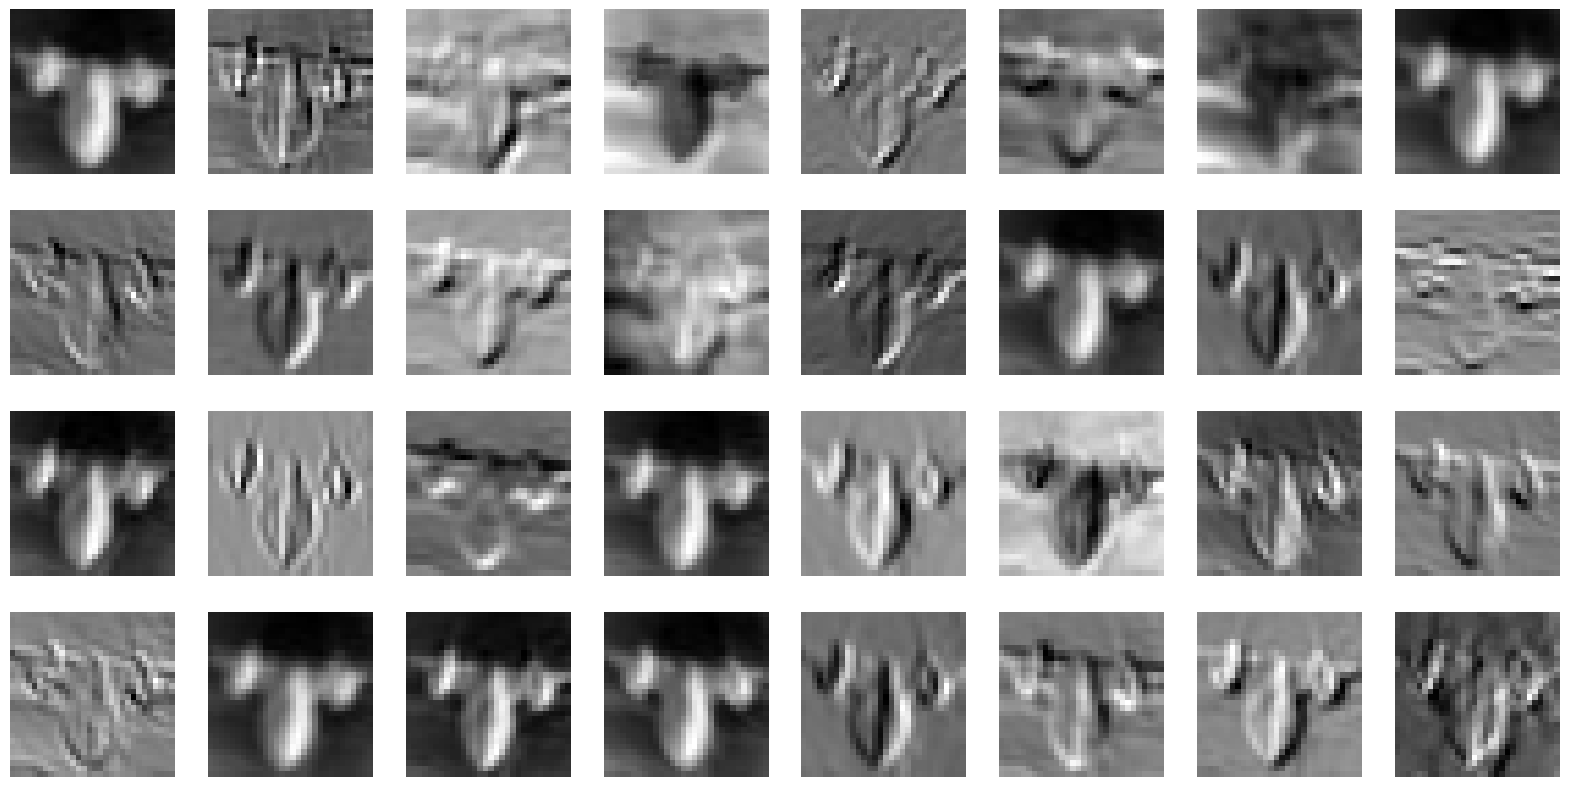

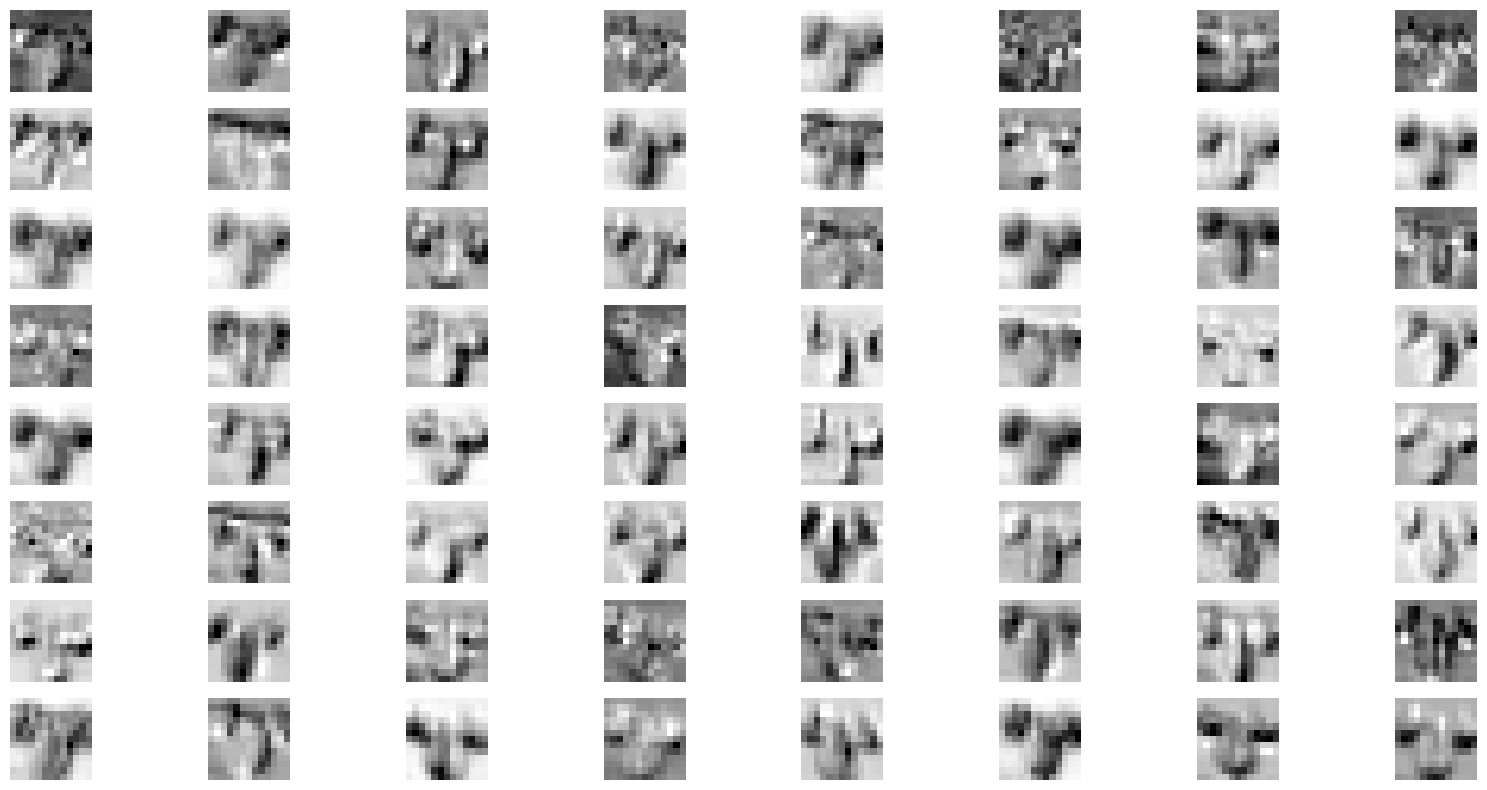

In [34]:
trainFeatures, trainLabels = next(iter(trainLoader))
X = trainFeatures[0]
# X = v2.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5)(X)
# plt.imshow(X.permute(1, 2, 0))
# plt.show()
X = X.to(device)

out1 = model.conv3[0](X)  # Conv2d
out2 = model.conv3[1](out1)  # ReLU
out3 = model.conv3[2](out2)  # MaxPool2d
out4 = model.conv3[3](out3)  # Conv2d

images = model.conv3[0](X).cpu().detach().numpy()
images3 = out4.cpu().detach().numpy()

def plot_images(images):
    fig, axes = plt.subplots(len(images) // 8, 8, figsize=(20, 10))

    # Loop through the images and plot them on the subplots
    for i in range(len(images)):
        row, col = i // 8, i % 8
        axes[row, col].imshow(images[i], cmap='gray')
        axes[row, col].axis('off')
    plt.show()

plot_images(images)
plot_images(images3)

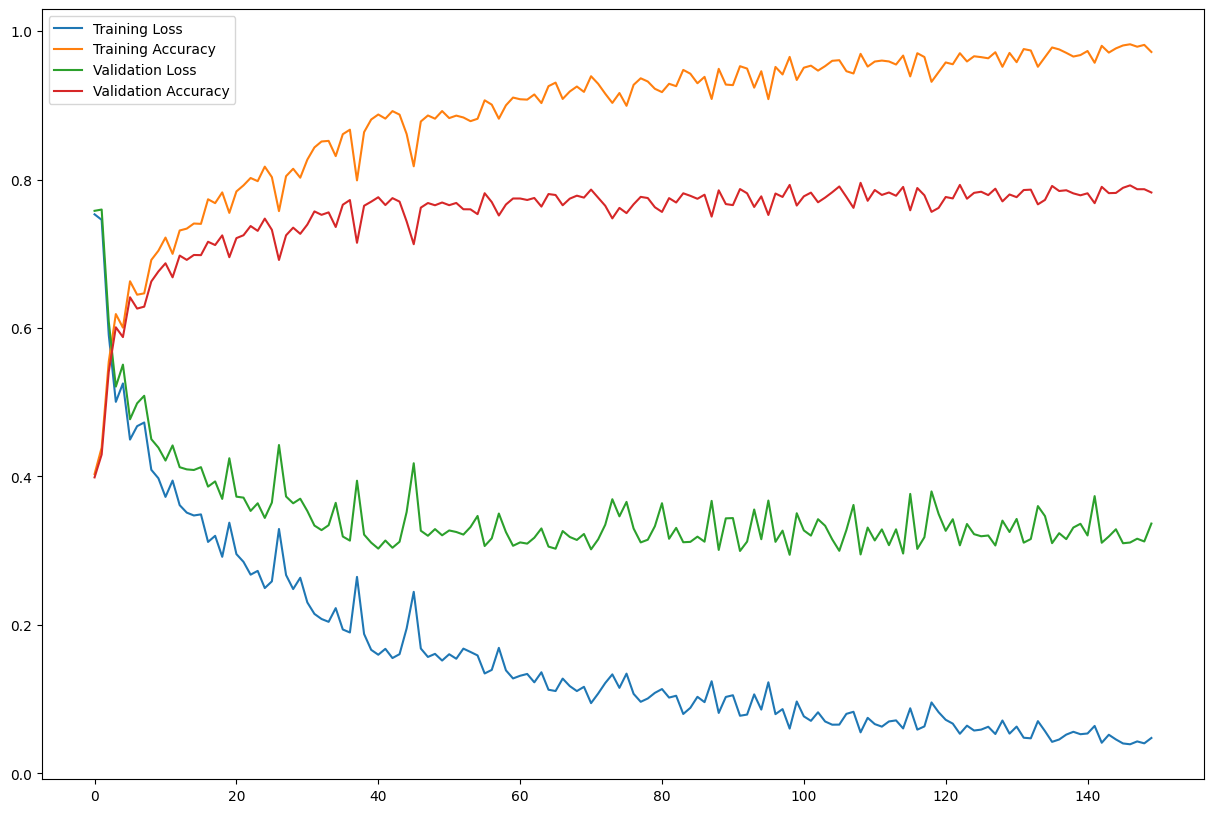

In [20]:
import matplotlib.pyplot as plt

# Assuming matrix is a list of lists where each list contains [trainLoss, trainCorrect, validLoss, validCorrect]
trainLosses, trainCorrects, validLosses, validCorrects = zip(*matrix)

# Create a single plot
fig, ax = plt.subplots(figsize=(15, 10))

# Plot training loss
ax.plot(trainLosses, label='Training Loss')

# Plot training accuracy
ax.plot(trainCorrects, label='Training Accuracy')

# Plot validation loss
ax.plot(validLosses, label='Validation Loss')

# Plot validation accuracy
ax.plot(validCorrects, label='Validation Accuracy')

# Add a legend
ax.legend()

# Display the plot
plt.show(fig)

In [ ]:
import torchvision.models as models
from d2l import torch as d2l

alexnet = models.alexnet(weights='IMAGENET1K_V1')
alexnet.to(device)

size = len(valLoader.dataset)
alexnet.eval()
validLoss, validCorrect = 0, 0
with torch.no_grad():
    for X, y in valLoader:
        X, y = X.to(device), y.to(device)
        pred = alexnet(X)
        validLoss += loss_fn(pred, y).item()
        validCorrect += (pred.argmax(1) == y).type(torch.float).sum().item()

validLoss /= len(valLoader.dataset)
validCorrect /= len(valLoader.dataset)
# Multiply losses by 100
validLoss *= 30
print(f"Validation Error: \n Accuracy: {(100*validCorrect):>0.1f}%, Avg loss: {validLoss:>8f} \n")